# Linear Algebra with Penguins

Copyright 2024 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def decorate(**options):
    """Decorate the current axes.
    
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
             
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    ax = plt.gca()
    ax.set(**options)
    
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

    plt.tight_layout()

In [3]:
def underride(d, **options):
    """Add key-value pairs to d only if key is not in d.

    d: dictionary
    options: keyword args to add to d
    """
    for key, val in options.items():
        d.setdefault(key, val)

    return d

In [4]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    """
    
    Modified from: https://github.com/ageron/handson-ml3/blob/main/math_linear_algebra.ipynb
    """
    underride(options, head_width=0.1, head_length=0.15, length_includes_head=True)
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1], **options)

In [5]:
# Load the data files from https://github.com/allisonhorst/palmerpenguins
# With gratitude to Allison Horst (@allison_horst)

import os

if not os.path.exists('penguins_raw.csv'):
    !wget https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins_raw.csv

The dataset is stored in a CSV file, which contains one row for each penguin and one column for each variable.

I'll use Pandas to read the CSV file and put the results in a `DataFrame`.

In [6]:
df = pd.read_csv('penguins_raw.csv')
df.shape

(344, 17)

In [7]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Three species of penguins are represented in the dataset: Adelie, Chinstrap and Gentoo, as shown in this illustration (by Allison Horst, available under the [CC-BY](https://creativecommons.org/licenses/by/2.0/) license):

<img width="400" src="https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/lter_penguins.png?raw=true">

In this dataset we are told that there are three species, and we are told which species each penguin belongs to.
But for purposes of clustering, we'll pretend we don't have this information and we'll see whether the algorithm "discovers" the different species.

The measurements we'll use are:

* Body Mass in grams (g).

* Flipper Length in millimeters (mm).

* Culmen Length in millimeters.  

* Culmen Depth in millimeters.

If you are not familiar with the word "culmen", it refers to the [top margin of the beak](https://en.wikipedia.org/wiki/Bird_measurement#Culmen), as shown in the following illustration (also by Allison Horst):

<img width="400" src="https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/culmen_depth.png?raw=true">

In [8]:
species = 'Chinstrap penguin (Pygoscelis antarctica)'

chinstrap = df.query(f'Species == "{species}"')
chinstrap.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
276,PAL0708,1,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N61A1,No,2007-11-19,46.5,17.9,192.0,3500.0,FEMALE,9.03935,-24.30229,Nest never observed with full clutch.
277,PAL0708,2,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N61A2,No,2007-11-19,50.0,19.5,196.0,3900.0,MALE,8.92069,-24.23592,Nest never observed with full clutch.
278,PAL0708,3,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N62A1,Yes,2007-11-26,51.3,19.2,193.0,3650.0,MALE,9.29078,-24.75570,NaN
279,PAL0708,4,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N62A2,Yes,2007-11-26,45.4,18.7,188.0,3525.0,FEMALE,8.64701,-24.62717,NaN
280,PAL0708,5,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N64A1,Yes,2007-11-21,52.7,19.8,197.0,3725.0,MALE,9.00642,-24.61867,NaN


In [9]:
var1 = 'Flipper Length (mm)'
var2 = 'Culmen Length (mm)'
var3 = 'Culmen Depth (mm)'
var4 = 'Body Mass (g)'

In [10]:
A = chinstrap[[var1, var4]].to_numpy()
n, m = A.shape
n, m

(68, 2)

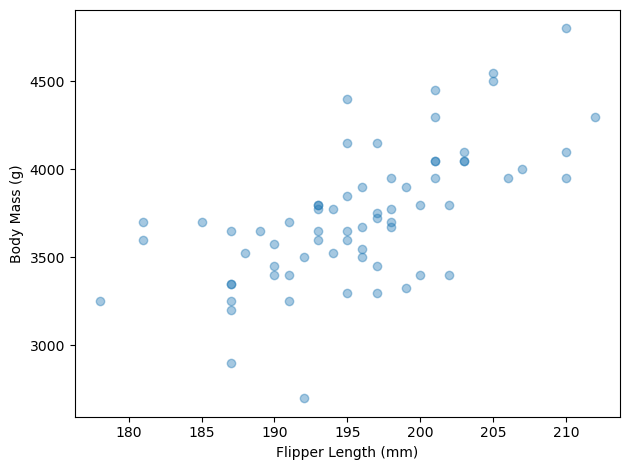

In [11]:
for (x, y) in A:
    plt.plot(x, y, 'o', color='C0', alpha=0.4)
    
decorate(xlabel=var1, ylabel=var4)

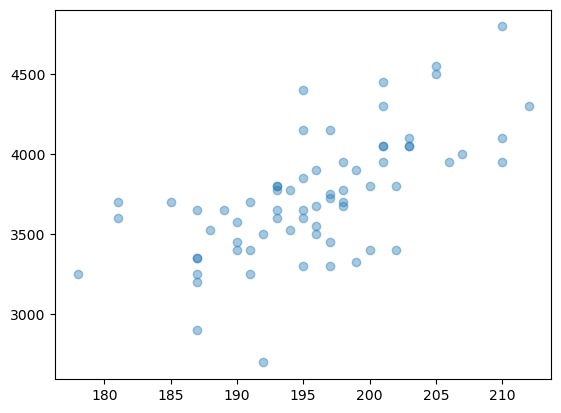

In [12]:
lengths, weights = A.transpose()
plt.plot(lengths, weights, 'o', alpha=0.4)

In [13]:
def scatter(A):
    xs, ys = A.transpose()
    plt.plot(xs, ys, 'o', alpha=0.4)

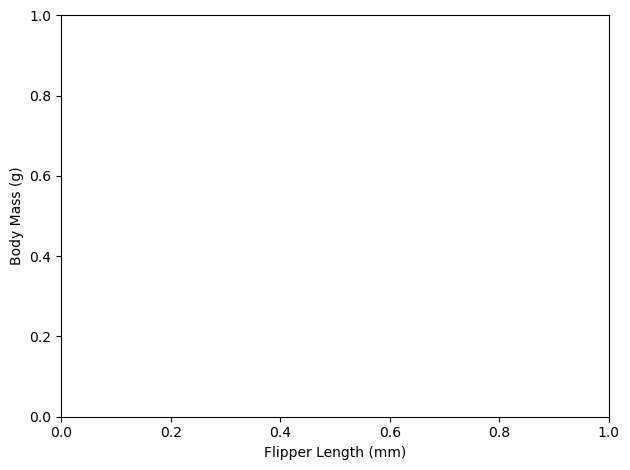

In [14]:
decorate(xlabel=var1, ylabel=var4)

In [15]:
np.corrcoef(lengths, weights)

array([[1.        , 0.64155941],
       [0.64155941, 1.        ]])

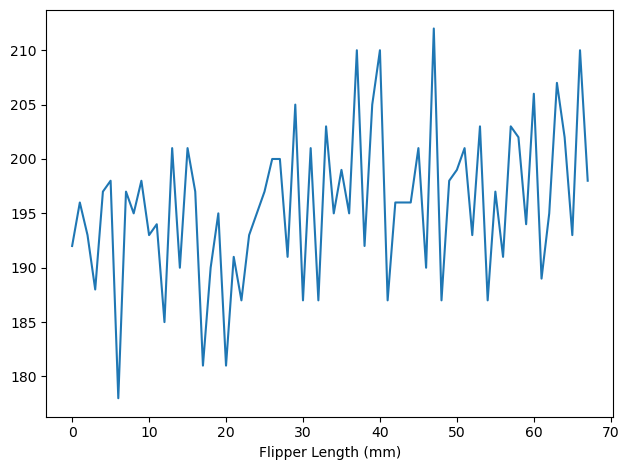

In [16]:
plt.plot(lengths)
decorate(xlabel=var1)

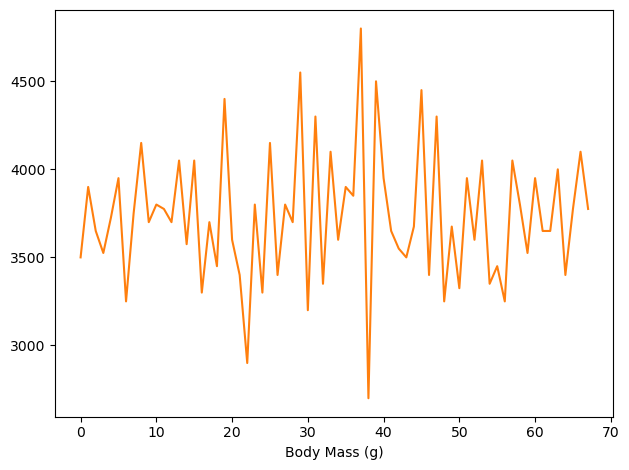

In [17]:
plt.plot(weights, color='C1')
decorate(xlabel=var4)

In [18]:
means = np.sum(A, axis=0) / n
means

array([ 195.82352941, 3733.08823529])

In [19]:
deviations = A - means

In [20]:
assert np.allclose(np.mean(deviations, axis=0), [0, 0])

In [21]:
msd = np.sum(deviations**2, axis=0) / n

In [22]:
stds = np.sqrt(msd)
stds

array([  7.07925963, 381.49862136])

In [23]:
assert np.allclose(stds, np.std(A, axis=0))

In [24]:
standardized = deviations / stds
standardized.shape

(68, 2)

In [25]:
standard_lengths, standard_weights = standardized.transpose()

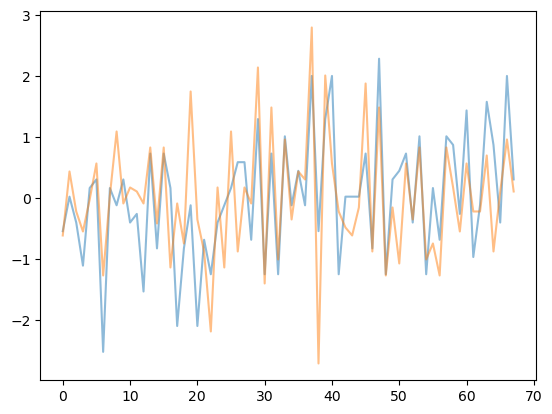

In [26]:
plt.plot(standard_lengths, alpha=0.5)
plt.plot(standard_weights, alpha=0.5)

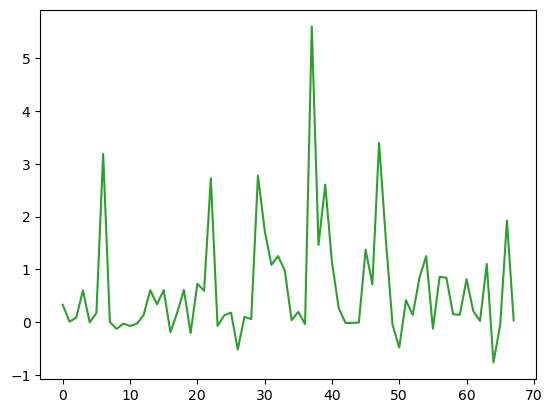

In [27]:
product = standard_lengths * standard_weights

plt.plot(product, color='C2')

In [28]:
r = np.sum(product) / n
r

0.6415594129316966

## Dot Product

In [29]:
np.dot(standard_lengths, standard_weights) / n

0.6415594129316967

In [30]:
np.dot(standardized.T, standardized) / n

array([[1.        , 0.64155941],
       [0.64155941, 1.        ]])

In [31]:
corr = standardized.T @ standardized / n
corr

array([[1.        , 0.64155941],
       [0.64155941, 1.        ]])

In [32]:
corr = np.corrcoef(A.T)
corr

array([[1.        , 0.64155941],
       [0.64155941, 1.        ]])

## Covariance matrix

In [33]:
np.dot(deviations.T, deviations) / n

array([[5.01159170e+01, 1.73267734e+03],
       [1.73267734e+03, 1.45541198e+05]])

In [34]:
np.var(lengths)

50.115916955017305

In [35]:
np.var(weights)

145541.1980968858

In [36]:
np.sum(deviations.prod(axis=1)) / n

1732.677335640138

In [37]:
np.cov(lengths, weights)

array([[5.08639157e+01, 1.75853819e+03],
       [1.75853819e+03, 1.47713455e+05]])

In [38]:
for i, row in enumerate(deviations.T):
    for j, col in enumerate(deviations.T):
        print(i, j, np.dot(row, col) / n)

0 0 50.115916955017305
0 1 1732.6773356401384
1 0 1732.6773356401384
1 1 145541.1980968858


## Eigenvectors



In [39]:
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [40]:
eigenvalues

array([1.64155941, 0.35844059])

In [41]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [42]:
np.cos(np.pi/4)

0.7071067811865476

In [43]:
v = [1, 0.2]
res = []

for i in range(5):
    res.append(v)
    v = corr @ v
    
vectors = np.array(res)
vectors.shape

(5, 2)

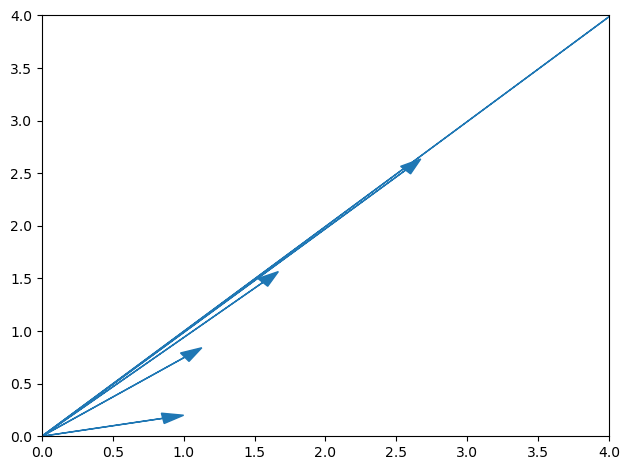

In [44]:
for row in vectors:
    plot_vector2d(row, color='C0')
    
lim = [0, 4]
decorate(xlim=lim, ylim=lim)

## Random

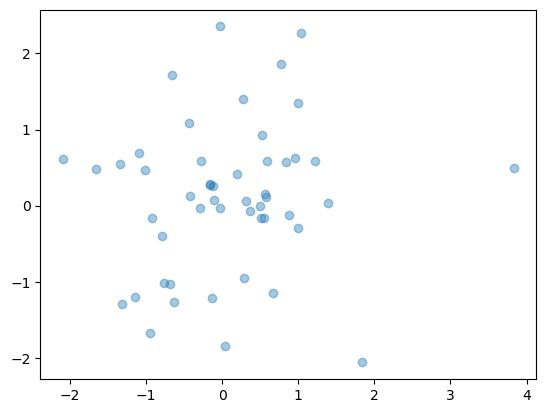

In [45]:
random = np.random.normal(size=(50, 2))

scatter(random)

In [46]:
corr

array([[1.        , 0.64155941],
       [0.64155941, 1.        ]])

In [47]:
chol = np.linalg.cholesky(corr)
chol.shape

(2, 2)

In [48]:
correlated = chol @ random.T
correlated.shape

(2, 50)

In [49]:
np.corrcoef(correlated)

array([[1.       , 0.7002169],
       [0.7002169, 1.       ]])

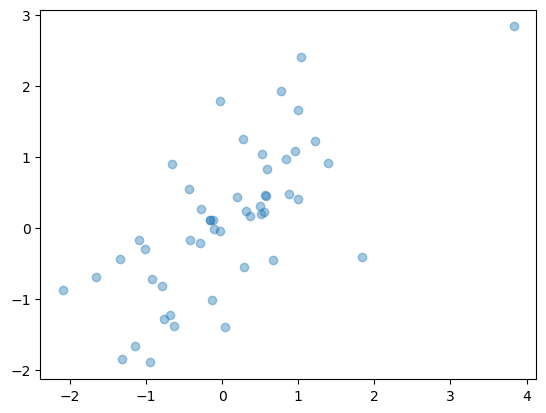

In [50]:
scatter(correlated.T)

In [51]:
res = []
for i in range(1000):
    random = np.random.normal(size=(50, 2))
    correlated = chol @ random.T
    r = np.corrcoef(correlated)[0][1]
    res.append(r)
    
np.mean(res)

0.6409695324553002

## Ovals

In [52]:
xs = np.linspace(0, 2*np.pi, 50)

In [53]:
P = np.array([np.sin(xs), np.cos(xs)])
P.shape

(2, 50)

In [54]:
def connect(A):
    xs, ys = A
    plt.plot(xs, ys, '-', alpha=0.4)

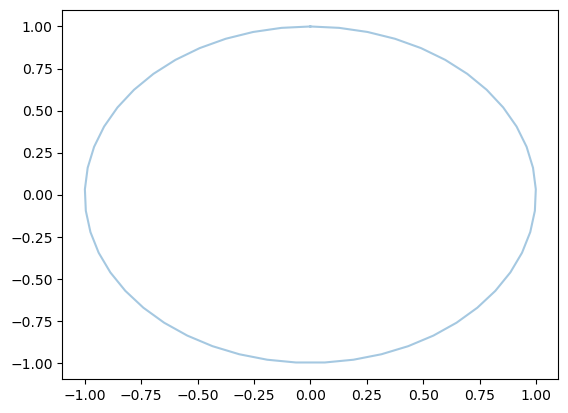

In [55]:
connect(P)

In [56]:
Q = chol @ P
Q.shape

(2, 50)

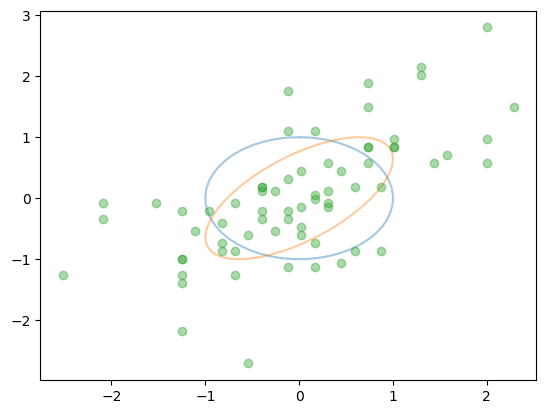

In [57]:
connect(P)
connect(Q)
scatter(standardized)

In [58]:
cov

NameError: name 'cov' is not defined